In [5]:
import pandas as pd

df = pd.read_csv('pima-indians-diabetes.csv',names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])
df.head(10)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
df[['pregnant','class']]


,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [13]:
df_data = df[['pregnant','class']]
df_group = df_data.groupby(['pregnant'], as_index = False)
df_group.mean().sort_values(by='pregnant', ascending = True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


<AxesSubplot:>

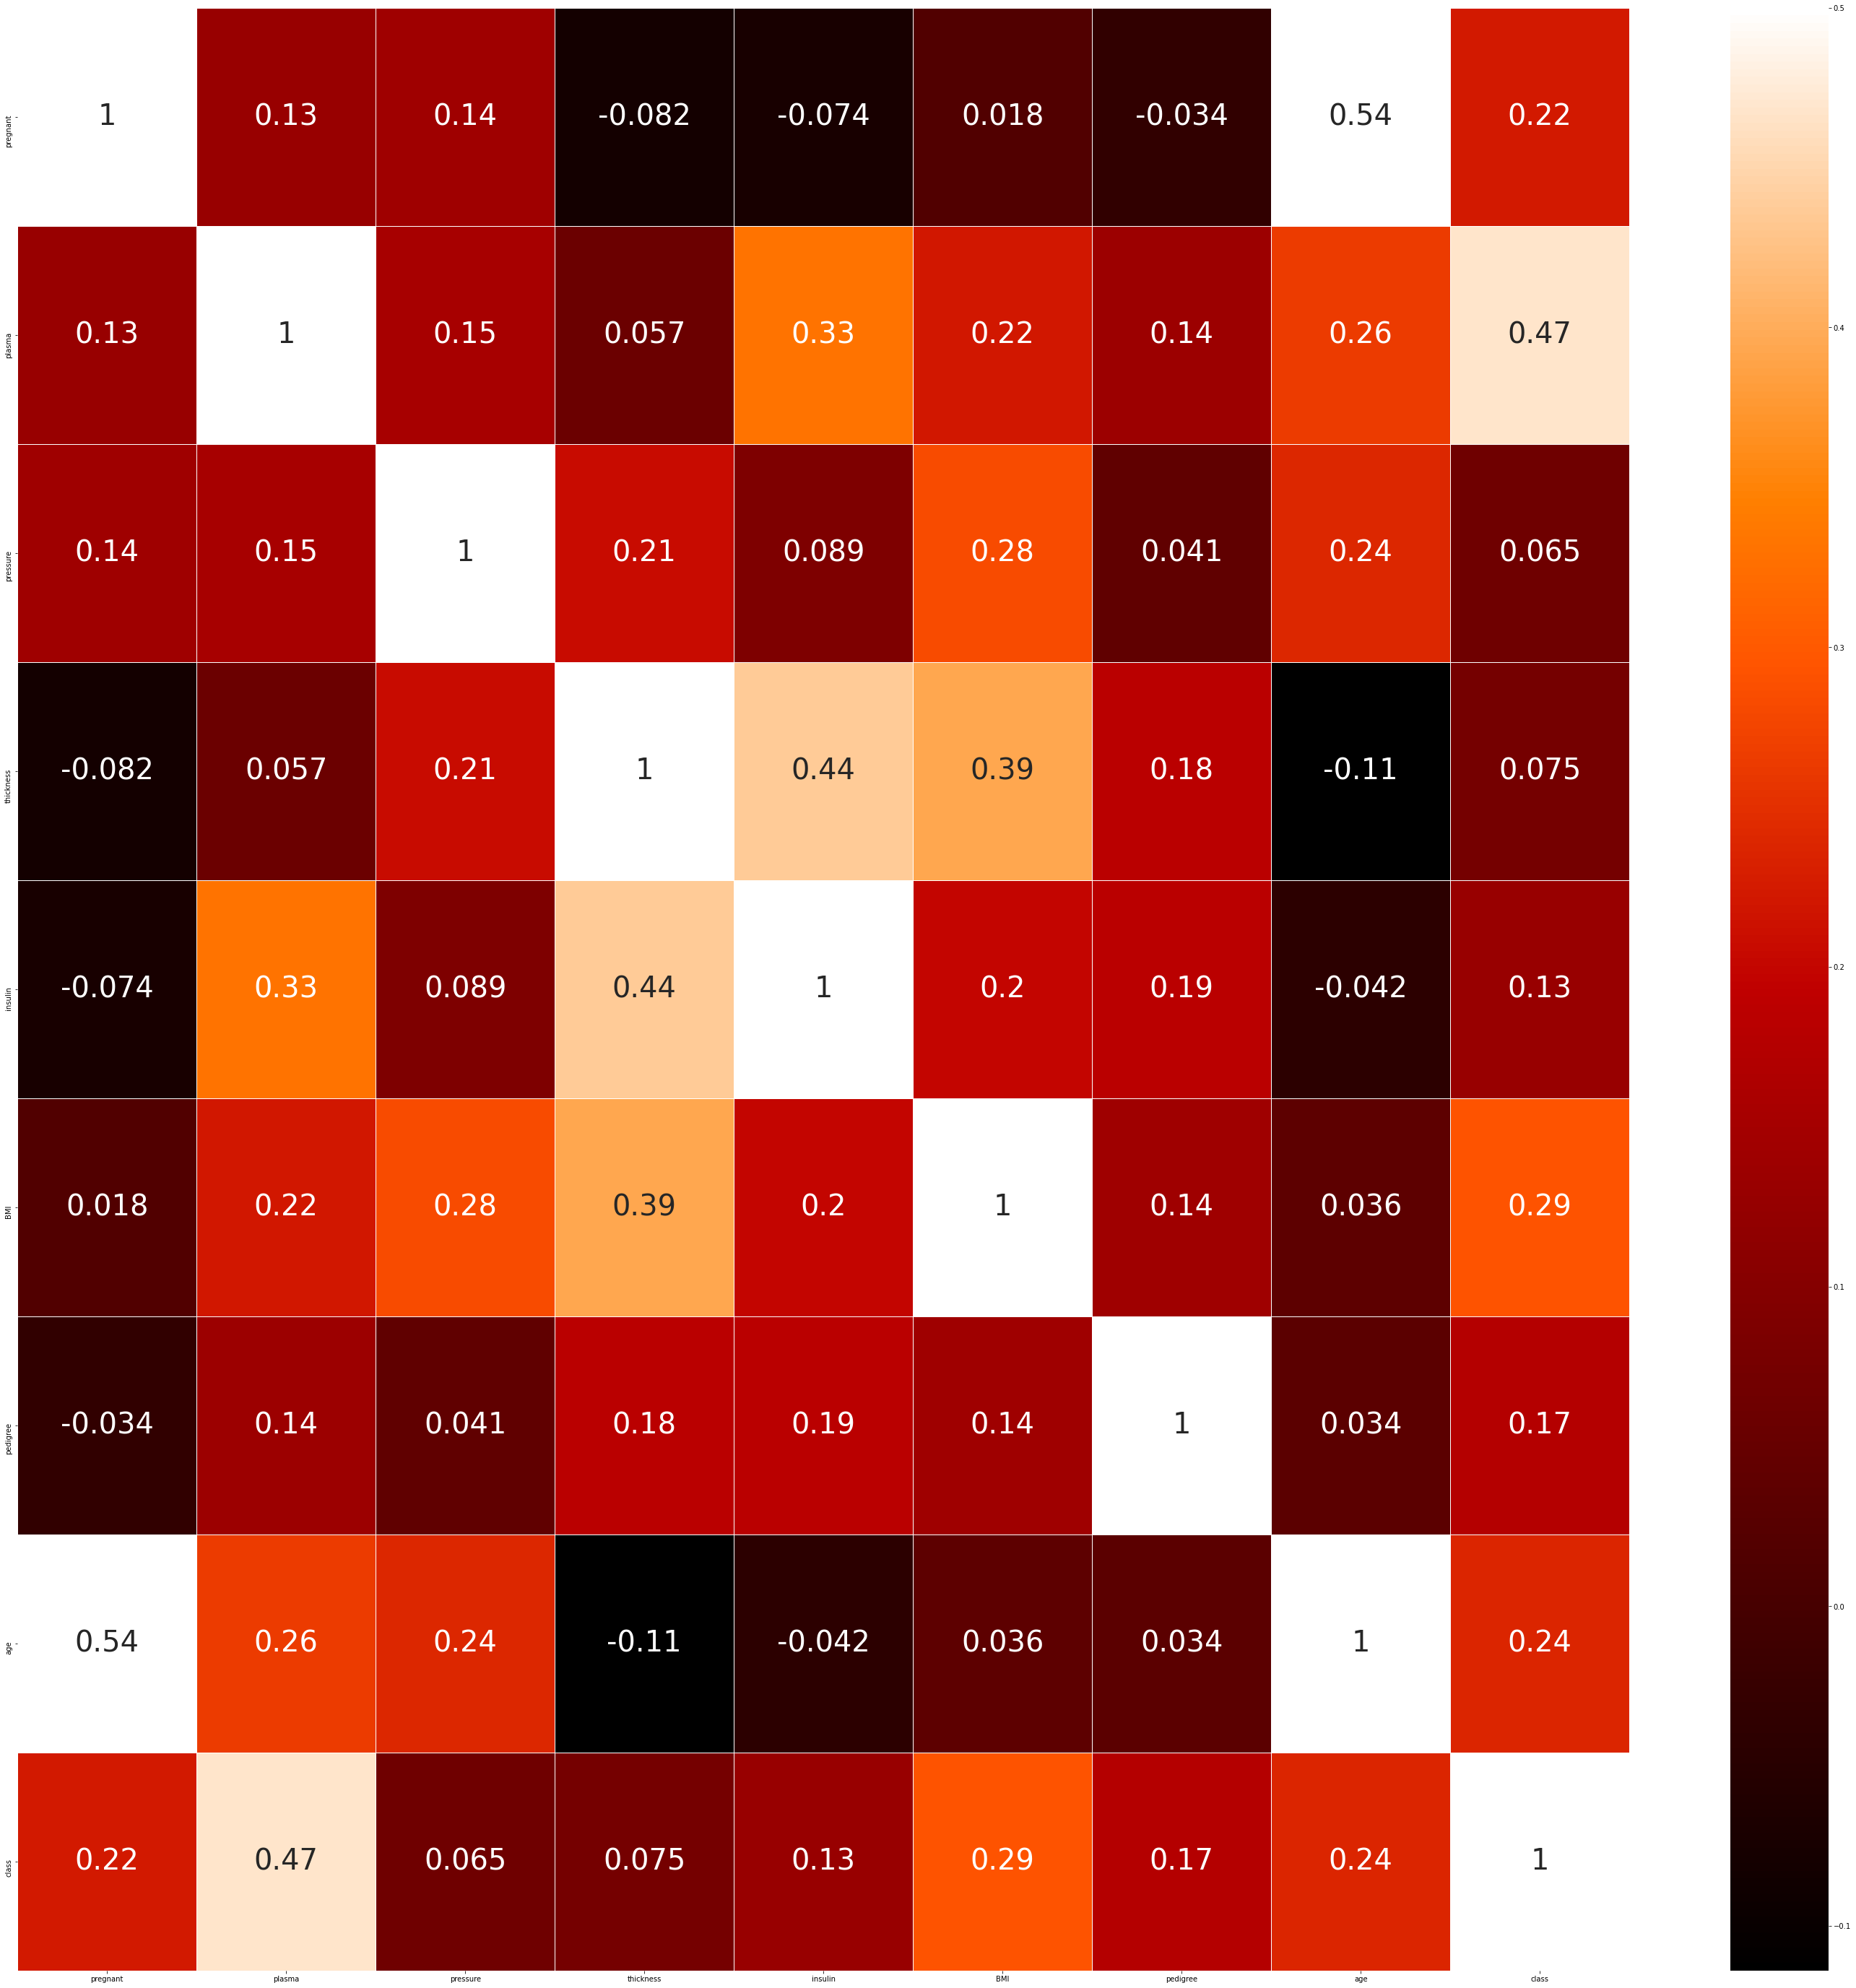

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat
plt.figure(figsize=(50,50))

#그래프의 속성을 결정합니다. vmax의 값을 0.5 로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.5, vmax=0.5, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 40}) #annot 은 annotation. 각 셀의 값을 표시할지 결정

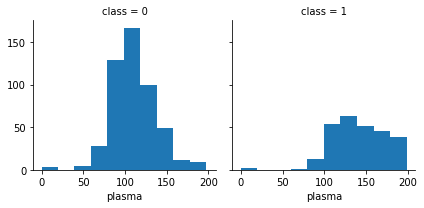

In [23]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [40]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

#실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

train, test = train_test_split(df, test_size=0.3)
train_arr = train.to_numpy()
test_arr = test.to_numpy()
X_train = train_arr[:, 0:8]
Y_train = train_arr[:, 8]


#모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#모델을 컴파일 합니다.
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
#모델을 실행합니다.
model.fit(X_train, Y_train, epochs = 300, batch_size=10)

X_test = test_arr[:,0:8]
Y_test = test_arr[:,8]
score = model.evaluate(X_test, Y_test, verbose = 0)
print(score)



Epoch 1/300
54/54 [==============================] - 0s 635us/step - loss: 13.8304 - accuracy: 0.6711
Epoch 2/300
54/54 [==============================] - 0s 542us/step - loss: 8.8063 - accuracy: 0.6356
Epoch 3/300
54/54 [==============================] - 0s 527us/step - loss: 5.5876 - accuracy: 0.6309
Epoch 4/300
54/54 [==============================] - 0s 482us/step - loss: 3.3894 - accuracy: 0.5071
Epoch 5/300
54/54 [==============================] - 0s 508us/step - loss: 2.2879 - accuracy: 0.5469
Epoch 6/300
54/54 [==============================] - 0s 489us/step - loss: 2.0169 - accuracy: 0.4710
Epoch 7/300
54/54 [==============================] - 0s 497us/step - loss: 1.0745 - accuracy: 0.5577
Epoch 8/300
54/54 [==============================] - 0s 508us/step - loss: 0.7644 - accuracy: 0.5755
Epoch 9/300
54/54 [==============================] - 0s 489us/step - loss: 0.7167 - accuracy: 0.5871
Epoch 10/300
54/54 [==============================] - 0s 486us/step - loss: 0.7301 - accur

54/54 [==============================] - 0s 464us/step - loss: 0.5015 - accuracy: 0.7422
Epoch 161/300
54/54 [==============================] - 0s 452us/step - loss: 0.4845 - accuracy: 0.7741
Epoch 162/300
54/54 [==============================] - 0s 452us/step - loss: 0.4881 - accuracy: 0.7591
Epoch 163/300
54/54 [==============================] - 0s 452us/step - loss: 0.4541 - accuracy: 0.7871
Epoch 164/300
54/54 [==============================] - 0s 452us/step - loss: 0.4756 - accuracy: 0.7777
Epoch 165/300
54/54 [==============================] - 0s 470us/step - loss: 0.4659 - accuracy: 0.7677
Epoch 166/300
54/54 [==============================] - 0s 452us/step - loss: 0.4661 - accuracy: 0.7538
Epoch 167/300
54/54 [==============================] - 0s 452us/step - loss: 0.4690 - accuracy: 0.7650
Epoch 168/300
54/54 [==============================] - 0s 470us/step - loss: 0.4917 - accuracy: 0.7607
Epoch 169/300
54/54 [==============================] - 0s 452us/step - loss: 0.4817 - a

In [42]:
X_test = test_arr[:,0:8]
prediction = model.predict(X_test)
환자 = prediction[int(input('조사할 환자의 번호를 넣으세요'))]
p = 환자[0] * 100
print(f'당뇨병일 확률은 {p}%, 정확도는 {score[1]*100}%입니다.')


조사할 환자의 번호를 넣으세요4
당뇨병일 확률은 14.288309216499329%, 정확도는 66.23376607894897%입니다.


### 다중 분류문제 해결

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

#데이터 입력
df =pd.read_csv('iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"] )

print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


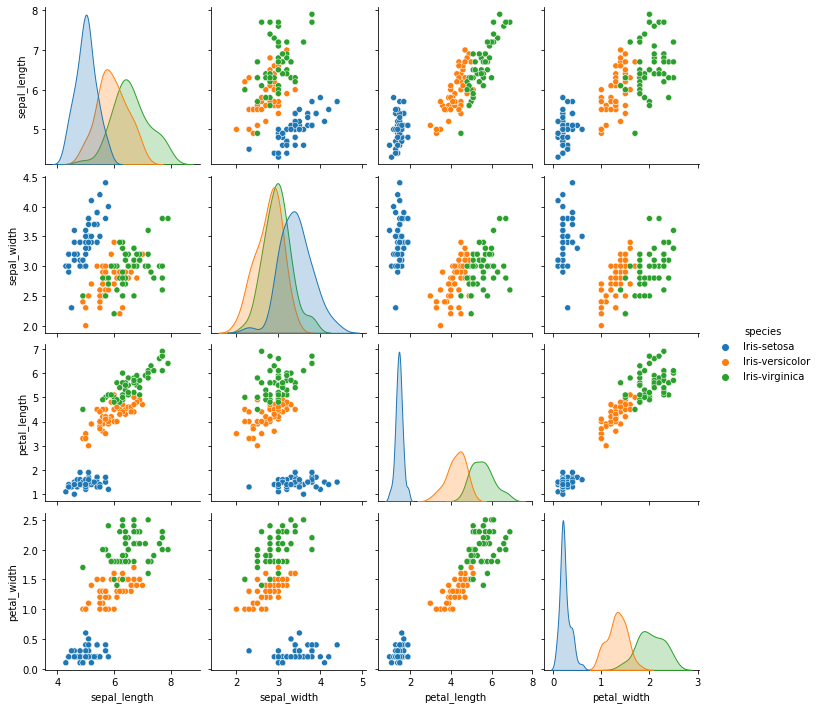

In [48]:
sns.pairplot(df, hue='species')
plt.show()

In [55]:
#데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

#문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
Y_encoded = tf.keras.utils.to_categorical(Y)
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [57]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))  # 결과값 종류가 3개 이므로 sigmoid 사용 안함.

In [59]:
#모델 컴파일 후 실행
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행 
model.fit(X, Y_encoded, epochs = 50, batch_size = 1)

#결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))



Epoch 1/50
150/150 [==============================] - 0s 468us/step - loss: 0.1174 - accuracy: 0.9592
Epoch 2/50
150/150 [==============================] - 0s 427us/step - loss: 0.1075 - accuracy: 0.9755
Epoch 3/50
150/150 [==============================] - 0s 392us/step - loss: 0.0820 - accuracy: 0.9722
Epoch 4/50
150/150 [==============================] - 0s 403us/step - loss: 0.1094 - accuracy: 0.9629
Epoch 5/50
150/150 [==============================] - 0s 395us/step - loss: 0.0865 - accuracy: 0.9864
Epoch 6/50
150/150 [==============================] - 0s 392us/step - loss: 0.0882 - accuracy: 0.9874
Epoch 7/50
150/150 [==============================] - 0s 412us/step - loss: 0.0729 - accuracy: 0.9819
Epoch 8/50
150/150 [==============================] - 0s 430us/step - loss: 0.1066 - accuracy: 0.9577
Epoch 9/50
150/150 [==============================] - 0s 429us/step - loss: 0.0965 - accuracy: 0.9631
Epoch 10/50
150/150 [==============================] - 0s 407us/step - loss: 0.100

In [61]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# ## 학습용, 테스트용 데이터 분리 후 재실행 ##
# import numpy as np
# from sklearn.model_selection import train_test_split
# np.random.seed(3)
# train, test = train_test_split(df, test_size = 0.2)
# train_arr = train.to_numpy()
# test_arr = test.to_numpy()
# X_train = train_arr[:,0:4]
# y_train = train_arr[:,4]
# X_test = test_arr[:,0:4]
# y_test = test_arr[:,4]
# model = Sequential()
# model.add(Dense(16, input_dim = 4, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
# model.fit(X, Y_encoded, epochs=50, batch_size = 1)
# model.evaluate(X, Y_encoded)

### 원핫 인코딩을 사용하지 않고 loss 를 다른것을 써서 더 빠르고 쉽게 가능

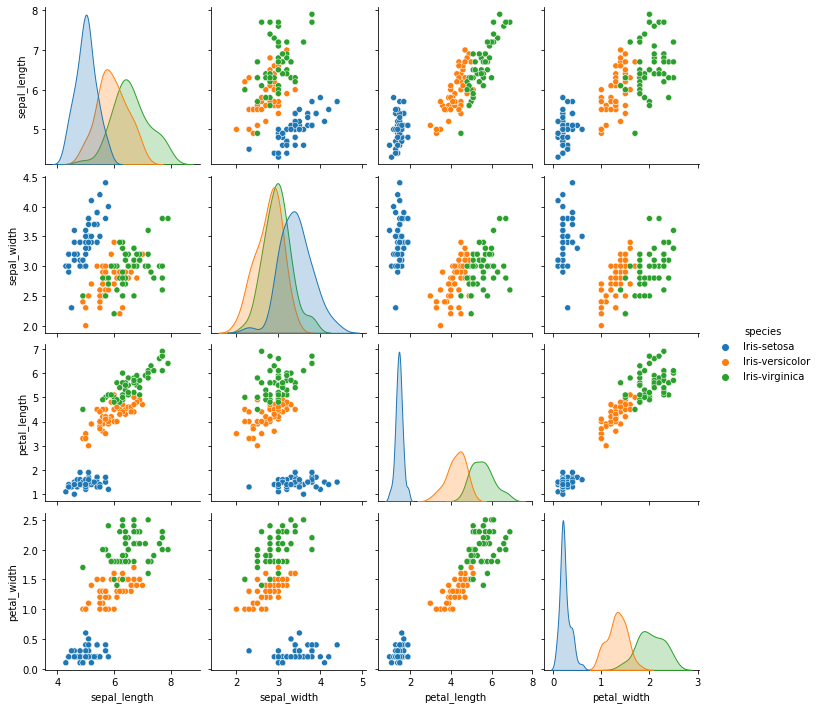

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.

Epoch 1/50
150/150 [==============================] - 0s 451us/step - loss: 1.3596 - accuracy: 0.3224
Epoch 2/50
150/150 [==============================] - 0s 388us/step - loss: 1.0380 - accuracy: 0.4188
Epoch 3/50
150/150 [==============================] - 0s 417us/step - loss: 0.8368 - accuracy: 0.3967
Epoch 4/50
150/150 [==============================] - 0s 413us/step - loss: 0.6857 - accuracy: 0.8066
Epoch 5/50
150/150 [==============================] - 0s 375us/step - loss: 0.5412 - accuracy: 0.8685
Epoch 6/50
150/150 [==============================] - 0s 375us/step - loss: 0.4882 - accuracy: 0.9486
Epoch 7/50
150/150 [==============================] - 0s 375us/step - loss: 0.4059 - accuracy: 0.9672
Epoch 8/50
150/150 [==============================] - 0s 382us/step - loss: 0.4311 - accuracy: 0.8957
Epoch 9/50
150/150 [==============================] - 0s 375us/step - loss: 0.3470 - accuracy: 0.9233
Epoch 10/50
150/150 [==============================] - 0s 382us/step - loss: 0.323

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)
# 데이터 입력
df = pd.read_csv('iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
# 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()
# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]
# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj) #원-핫 인코딩 안한 것
Y_encoded = tf.keras.utils.to_categorical(Y) #원-핫 인코딩 한 것
print(Y) #일반 라벨
print(Y_encoded) #원-핫 인코딩 라벨
print("모델 1")
# 원-핫 인코딩 필요한 모델의 설정
model_1 = Sequential()
model_1.add(Dense(16,  input_dim=4, activation='relu'))
model_1.add(Dense(3, activation='softmax'))
# 모델 컴파일
model_1.compile(loss='categorical_crossentropy', #원-핫 인코딩이 필요한 손실 함수
            optimizer='adam',
            metrics=['accuracy'])
print("원-핫 인코딩이 필요한 모델")
model_1.summary()
# 원-핫 인코딩 필요한 모델 실행
model_1.fit(X, Y_encoded, epochs=50, batch_size=1)
# 결과 출력
print("\n Accuracy: %.4f" % (model_1.evaluate(X, Y_encoded)[1]))
print("모델 2")
# 원-핫 인코딩이 필요 없는 모델의 설정
model_2 = Sequential()
model_2.add(Dense(16,  input_dim=4, activation='relu'))
model_2.add(Dense(3, activation='softmax'))
# 모델 컴파일
model_2.compile(loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
print("원-핫 인코딩이 필요 없는 모델")
model_2.summary()
# 원-핫 인코딩이 필요 없는 모델 실행
model_2.fit(X, Y, epochs=50, batch_size=1)
# 결과 출력
print("\n Accuracy: %.4f" % (model_2.evaluate(X, Y)[1]))

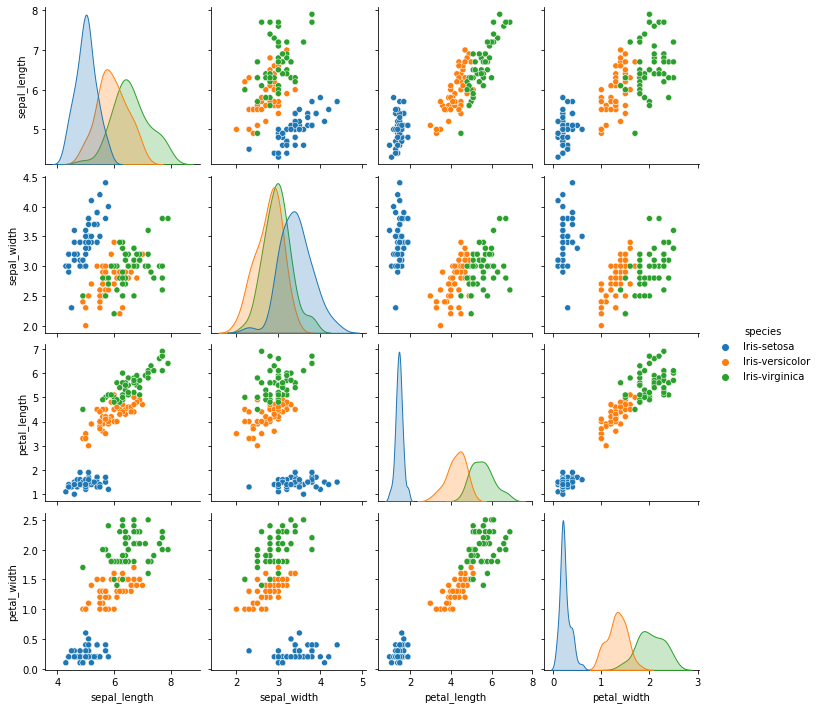

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)
# 데이터 입력
df = pd.read_csv('iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
# 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()
# 데이터 분류
dataset = df.values

### 초음파 광물 예측

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf

#seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

#데이터 입력
df = pd.read_csv('sonar.csv',header=None)

print(df.shape)
df.head()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [68]:
dataset = df.values
X = dataset[:,0:60]
X = np.asarray(X).astype(np.float32)   # dtype이 object인데, float로 바꿔준다.


### 모델을 컴퓨터에 저장, 새로 불러옴

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy
import tensorflow as tf
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)
# 데이터 입력
df = pd.read_csv('sonar.csv', header=None)
'''
# 데이터 개괄 보기
print(df.info())
# 데이터의 일부분 미리 보기
print(df.head())
'''
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]
# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
# 모델 설정
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 모델 컴파일
model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
# # 모델 실행
model.fit(X, Y, epochs=100, batch_size=5)
model.save('my_model.h5')  # 모델을 컴퓨터에 저장

# model =  load_model('my_model.h5') #모델을 새로 불러옴
# 불러온 뒤 model.predict를 하면됨.
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/100
42/42 [==============================] - 0s 825us/step - loss: 0.6844 - accuracy: 0.5403
Epoch 2/100
42/42 [==============================] - 0s 486us/step - loss: 0.6610 - accuracy: 0.5863
Epoch 3/100
42/42 [==============================] - 0s 511us/step - loss: 0.6239 - accuracy: 0.6651
Epoch 4/100
42/42 [==============================] - 0s 523us/step - loss: 0.6026 - accuracy: 0.6914
Epoch 5/100
42/42 [==============================] - 0s 566us/step - loss: 0.5783 - accuracy: 0.7494
Epoch 6/100
42/42 [==============================] - 0s 517us/step - loss: 0.5361 - accuracy: 0.7378
Epoch 7/100
42/42 [==============================] - 0s 546us/step - loss: 0.5085 - accuracy: 0.7755
Epoch 8/100
42/42 [==============================] - 0s 510us/step - loss: 0.4644 - accuracy: 0.7959
Epoch 9/100
42/42 [==============================] - 0s 560us/step - loss: 0.4818 - accuracy: 0.8033
Epoch 10/100
42/42 [==============================] - 0s 510us/step - loss: 0.4388 - accura

Epoch 81/100
42/42 [==============================] - 0s 508us/step - loss: 0.1681 - accuracy: 0.9384
Epoch 82/100
42/42 [==============================] - 0s 511us/step - loss: 0.1627 - accuracy: 0.9416
Epoch 83/100
42/42 [==============================] - 0s 486us/step - loss: 0.1096 - accuracy: 0.9766
Epoch 84/100
42/42 [==============================] - 0s 531us/step - loss: 0.1458 - accuracy: 0.9416
Epoch 85/100
42/42 [==============================] - 0s 487us/step - loss: 0.1177 - accuracy: 0.9695
Epoch 86/100
42/42 [==============================] - 0s 487us/step - loss: 0.1594 - accuracy: 0.9409
Epoch 87/100
42/42 [==============================] - 0s 511us/step - loss: 0.0801 - accuracy: 0.9765
Epoch 88/100
42/42 [==============================] - 0s 478us/step - loss: 0.1473 - accuracy: 0.9296
Epoch 89/100
42/42 [==============================] - 0s 487us/step - loss: 0.1048 - accuracy: 0.9829
Epoch 90/100
42/42 [==============================] - 0s 511us/step - loss: 0.0970

In [ ]:
from tensorflow.keras
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()